In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Basic info

In [2]:
file_path = "../data/customer_segmentation.csv"
df = pd.read_csv(file_path)

print("Shape of dataset:", df.shape)
print("\nColumn names:\n", df.columns.tolist())
print("\nData types:\n", df.dtypes)
print("\nMissing values per column:\n", df.isnull().sum())

Shape of dataset: (2240, 29)

Column names:
 ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']

Data types:
 ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        in

### Handle Missing Values & Data Cleaning

In [3]:
# Comprehensive Missing Data Analysis
print("="*60)
print("MISSING DATA ANALYSIS FOR DECISION MAKING")
print("="*60)

# Calculate missing data percentage
total_rows = len(df)
missing_income = df['Income'].isnull().sum()
missing_percentage = (missing_income / total_rows) * 100

print(f"Dataset size: {total_rows:,} customers")
print(f"Missing Income values: {missing_income}")
print(f"Missing percentage: {missing_percentage:.2f}%")

# Analyze pattern of missing data
print(f"\n{'='*40}")
print("MISSING DATA PATTERN ANALYSIS:")
print(f"{'='*40}")

# Check if missing income is random or systematic
print("\n1. Missing Income by Education Level:")
education_missing = df.groupby('Education')['Income'].apply(lambda x: x.isnull().sum())
education_total = df.groupby('Education').size()
education_missing_pct = (education_missing / education_total * 100).round(2)

for edu in education_missing.index:
    print(f"   {edu}: {education_missing[edu]}/{education_total[edu]} ({education_missing_pct[edu]}%)")

print("\n2. Missing Income by Marital Status:")
marital_missing = df.groupby('Marital_Status')['Income'].apply(lambda x: x.isnull().sum())
marital_total = df.groupby('Marital_Status').size()
marital_missing_pct = (marital_missing / marital_total * 100).round(2)

for status in marital_missing.index:
    print(f"   {status}: {marital_missing[status]}/{marital_total[status]} ({marital_missing_pct[status]}%)")

# Analyze spending patterns of missing income customers
print("\n3. Spending Analysis for Missing Income Customers:")
missing_mask = df['Income'].isnull()
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

print("\nAverage spending (Missing Income vs Available Income):")
for col in spending_cols:
    missing_avg = df[missing_mask][col].mean()
    available_avg = df[~missing_mask][col].mean()
    print(f"   {col}: ${missing_avg:.2f} vs ${available_avg:.2f}")

total_spending_missing = df[missing_mask][spending_cols].sum(axis=1).mean()
total_spending_available = df[~missing_mask][spending_cols].sum(axis=1).mean()
print(f"\nTotal Average Spending:")
print(f"   Missing Income customers: ${total_spending_missing:.2f}")
print(f"   Available Income customers: ${total_spending_available:.2f}")

print(f"\n{'='*40}")
print("RECOMMENDATION ANALYSIS:")
print(f"{'='*40}")

# Statistical analysis for decision
from scipy import stats

# Compare distributions
print("\n4. Statistical Tests:")
missing_total_spend = df[missing_mask][spending_cols].sum(axis=1)
available_total_spend = df[~missing_mask][spending_cols].sum(axis=1)

# T-test to see if spending patterns are different
t_stat, p_value = stats.ttest_ind(missing_total_spend.dropna(), available_total_spend.dropna())
print(f"   T-test p-value for spending difference: {p_value:.6f}")
print(f"   Significant difference: {'Yes' if p_value < 0.05 else 'No'}")

# Calculate median and quartiles for potential imputation
income_stats = df['Income'].describe()
print(f"\n5. Income Distribution Stats (for imputation reference):")
print(f"   Mean: ${income_stats['mean']:,.2f}")
print(f"   Median: ${income_stats['50%']:,.2f}")
print(f"   Q1: ${income_stats['25%']:,.2f}")
print(f"   Q3: ${income_stats['75%']:,.2f}")
print(f"   Std Dev: ${income_stats['std']:,.2f}")

MISSING DATA ANALYSIS FOR DECISION MAKING
Dataset size: 2,240 customers
Missing Income values: 24
Missing percentage: 1.07%

MISSING DATA PATTERN ANALYSIS:

1. Missing Income by Education Level:
   2n Cycle: 3/203 (1.48%)
   Basic: 0/54 (0.0%)
   Graduation: 11/1127 (0.98%)
   Master: 5/370 (1.35%)
   PhD: 5/486 (1.03%)

2. Missing Income by Marital Status:
   Absurd: 0/2 (0.0%)
   Alone: 0/3 (0.0%)
   Divorced: 0/232 (0.0%)
   Married: 7/864 (0.81%)
   Single: 9/480 (1.88%)
   Together: 7/580 (1.21%)
   Widow: 1/77 (1.3%)
   YOLO: 0/2 (0.0%)

3. Spending Analysis for Missing Income Customers:

Average spending (Missing Income vs Available Income):
   MntWines: $197.21 vs $305.09
   MntFruits: $21.33 vs $26.36
   MntMeatProducts: $162.71 vs $167.00
   MntFishProducts: $27.17 vs $37.64
   MntSweetProducts: $30.21 vs $27.03
   MntGoldProds: $49.25 vs $43.97

Total Average Spending:
   Missing Income customers: $487.88
   Available Income customers: $607.08

RECOMMENDATION ANALYSIS:

4. S

In [4]:
# Implement Recommended Strategy: Remove Missing Values
print("IMPLEMENTING MISSING DATA STRATEGY")
print("="*50)

# Show before state
print(f"Before cleaning:")
print(f"Dataset shape: {df.shape}")
print(f"Missing values: {df['Income'].isnull().sum()}")

# Remove rows with missing Income values
df_clean = df.dropna(subset=['Income']).copy()

# Show after state
print(f"\nAfter cleaning:")
print(f"Dataset shape: {df_clean.shape}")
print(f"Missing values: {df_clean['Income'].isnull().sum()}")
print(f"Rows removed: {len(df) - len(df_clean)}")
print(f"Data retention: {(len(df_clean)/len(df)*100):.2f}%")

# Verify no missing values remain in any column
print(f"\nFinal missing value check across all columns:")
missing_summary = df_clean.isnull().sum()
if missing_summary.sum() == 0:
    print("✅ No missing values remaining - dataset is complete!")
else:
    print("Remaining missing values:")
    print(missing_summary[missing_summary > 0])

# Update our working dataframe
df = df_clean
print(f"\n🎯 Ready for customer segmentation analysis with {len(df):,} complete customer records!")

IMPLEMENTING MISSING DATA STRATEGY
Before cleaning:
Dataset shape: (2240, 29)
Missing values: 24

After cleaning:
Dataset shape: (2216, 29)
Missing values: 0
Rows removed: 24
Data retention: 98.93%

Final missing value check across all columns:
✅ No missing values remaining - dataset is complete!

🎯 Ready for customer segmentation analysis with 2,216 complete customer records!


### Convert date column to datetime

In [5]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")

### Basic Descriptive Statistics

#### Numerical features distribution

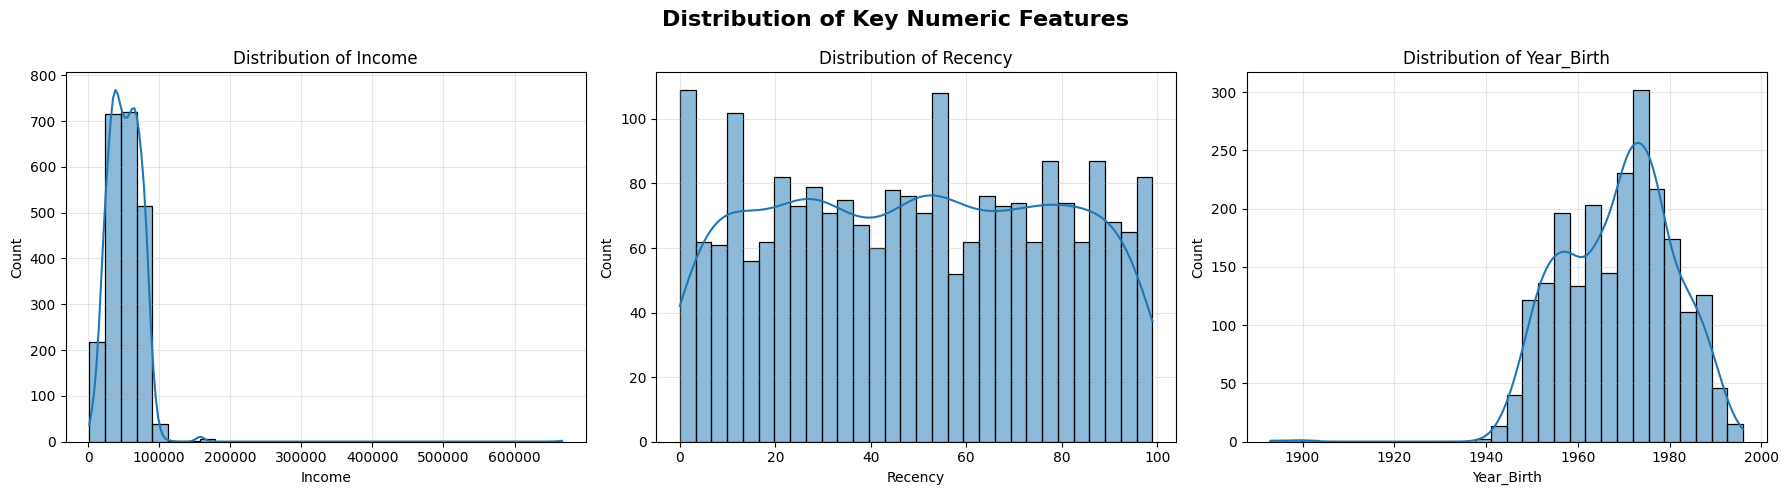

SUMMARY STATISTICS FOR KEY NUMERIC FEATURES
          Income  Recency  Year_Birth
count    2216.00  2216.00     2216.00
mean    52247.25    49.01     1968.82
std     25173.08    28.95       11.99
min      1730.00     0.00     1893.00
25%     35303.00    24.00     1959.00
50%     51381.50    49.00     1970.00
75%     68522.00    74.00     1977.00
max    666666.00    99.00     1996.00


In [6]:
# Plot distributions for key numeric features (optimized - no missing data)
numeric_cols = ["Income", "Recency", "Year_Birth"]

# Create subplots for better visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Distribution of Key Numeric Features", fontsize=16, fontweight='bold')

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Display summary statistics
print("SUMMARY STATISTICS FOR KEY NUMERIC FEATURES")
print("=" * 55)
summary_stats = df[numeric_cols].describe()
print(summary_stats.round(2))

## Categorical features countplots

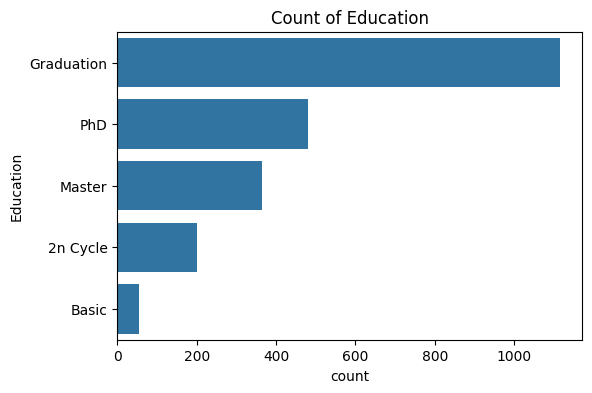

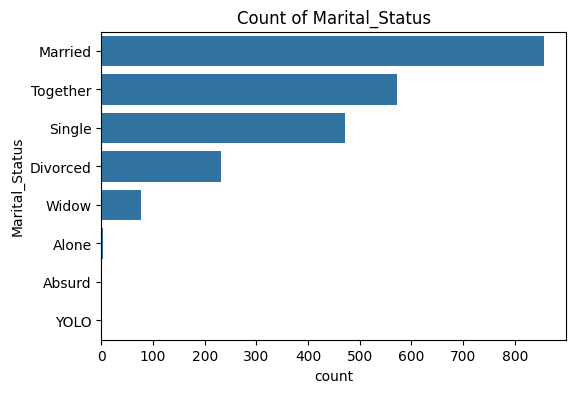

In [7]:
cat_cols = ["Education", "Marital_Status"]

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f"Count of {col}")
    plt.show()

In [8]:
# Get detailed statistics for categorical variables
print("Education Level Distribution:")
education_counts = df["Education"].value_counts()
education_percentages = df["Education"].value_counts(normalize=True) * 100
for level, count in education_counts.items():
    percentage = education_percentages[level]
    print(f"  {level}: {count} customers ({percentage:.1f}%)")

print(f"\nTotal customers: {len(df)}")
print(f"Most common education level: {education_counts.index[0]} ({education_counts.iloc[0]} customers)")

print("\n" + "="*50)
print("Marital Status Distribution:")
marital_counts = df["Marital_Status"].value_counts()
marital_percentages = df["Marital_Status"].value_counts(normalize=True) * 100
for status, count in marital_counts.items():
    percentage = marital_percentages[status]
    print(f"  {status}: {count} customers ({percentage:.1f}%)")

print(f"\nMost common marital status: {marital_counts.index[0]} ({marital_counts.iloc[0]} customers)")

Education Level Distribution:
  Graduation: 1116 customers (50.4%)
  PhD: 481 customers (21.7%)
  Master: 365 customers (16.5%)
  2n Cycle: 200 customers (9.0%)
  Basic: 54 customers (2.4%)

Total customers: 2216
Most common education level: Graduation (1116 customers)

Marital Status Distribution:
  Married: 857 customers (38.7%)
  Together: 573 customers (25.9%)
  Single: 471 customers (21.3%)
  Divorced: 232 customers (10.5%)
  Widow: 76 customers (3.4%)
  Alone: 3 customers (0.1%)
  Absurd: 2 customers (0.1%)
  YOLO: 2 customers (0.1%)

Most common marital status: Married (857 customers)


### Bivariate Analysis

#### Income vs Response

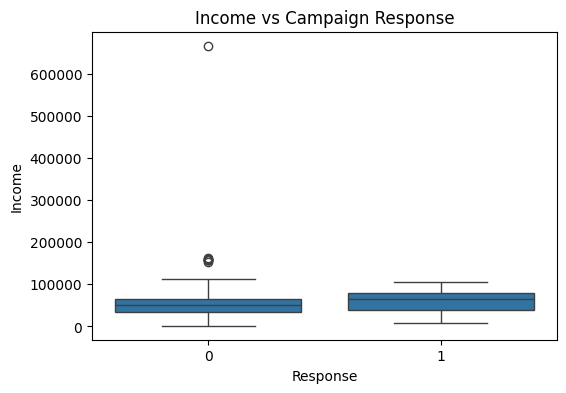

In [9]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Response", y="Income", data=df)
plt.title("Income vs Campaign Response")
plt.show()

In [10]:
# Detailed analysis of Income vs Response relationship
print("Income vs Campaign Response Analysis:")
print("="*45)

# Group by Response to get statistics
response_groups = df.groupby('Response')['Income']

print("Statistical Summary by Response:")
for response, group in response_groups:
    response_label = "Did NOT respond" if response == 0 else "DID respond"
    print(f"\n{response_label} (Response = {response}):")
    print(f"  Count: {len(group)} customers")
    print(f"  Mean Income: ${group.mean():,.2f}")
    print(f"  Median Income: ${group.median():,.2f}")
    print(f"  Standard Deviation: ${group.std():,.2f}")
    print(f"  Min Income: ${group.min():,.2f}")
    print(f"  Max Income: ${group.max():,.2f}")

# Calculate response rates by income quartiles
print(f"\n{'='*45}")
print("Response Rate by Income Quartiles:")
df['Income_Quartile'] = pd.qcut(df['Income'], q=4, labels=['Q1 (Lowest)', 'Q2', 'Q3', 'Q4 (Highest)'])

quartile_response = df.groupby('Income_Quartile', observed=False)['Response'].agg(['count', 'sum', 'mean'])
quartile_response.columns = ['Total_Customers', 'Responders', 'Response_Rate']
quartile_response['Response_Rate_Pct'] = quartile_response['Response_Rate'] * 100

for quartile in quartile_response.index:
    row = quartile_response.loc[quartile]
    print(f"{quartile}: {row['Response_Rate_Pct']:.1f}% response rate ({row['Responders']}/{row['Total_Customers']} customers)")

# Overall response rate
overall_response_rate = df['Response'].mean() * 100
print(f"\nOverall Response Rate: {overall_response_rate:.1f}%")

Income vs Campaign Response Analysis:
Statistical Summary by Response:

Did NOT respond (Response = 0):
  Count: 1883 customers
  Mean Income: $50,839.13
  Median Income: $50,150.00
  Standard Deviation: $25,252.80
  Min Income: $1,730.00
  Max Income: $666,666.00

DID respond (Response = 1):
  Count: 333 customers
  Mean Income: $60,209.68
  Median Income: $64,090.00
  Standard Deviation: $23,194.08
  Min Income: $7,500.00
  Max Income: $105,471.00

Response Rate by Income Quartiles:
Q1 (Lowest): 10.5% response rate (58.0/554.0 customers)
Q2: 12.5% response rate (69.0/554.0 customers)
Q3: 10.3% response rate (57.0/554.0 customers)
Q4 (Highest): 26.9% response rate (149.0/554.0 customers)

Overall Response Rate: 15.0%


### Correlation Heatmap

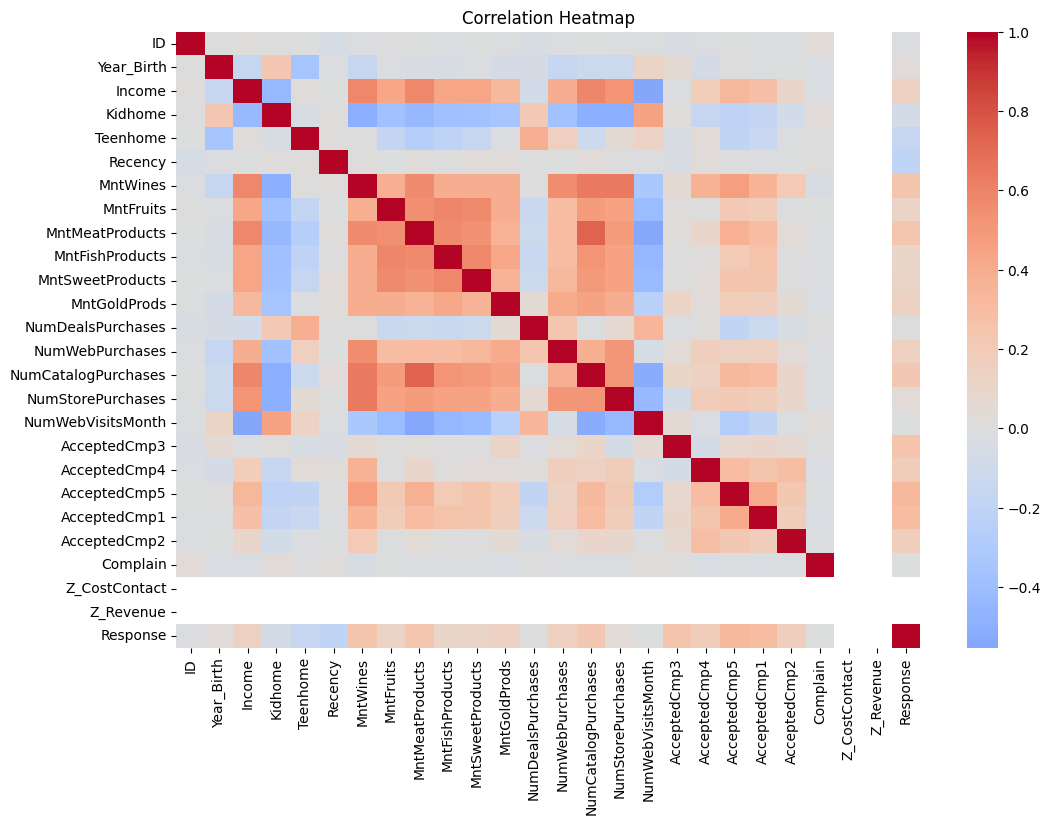

In [11]:
plt.figure(figsize=(12,8))
num_df = df.select_dtypes(include=np.number)
if num_df.empty:
    print("No numeric columns available for correlation.")
else:
    corr = num_df.corr()
    sns.heatmap(corr, cmap="coolwarm", center=0)
    plt.title("Correlation Heatmap")
    plt.show()

In [12]:
# Detailed correlation analysis
print("CORRELATION HEATMAP ANALYSIS")
print("="*50)

# Get the correlation matrix
correlation_matrix = num_df.corr()

# Find strongest positive correlations (excluding perfect correlations with self)
print("STRONGEST POSITIVE CORRELATIONS (> 0.5):")
print("-"*45)
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
strong_positive = upper_triangle[upper_triangle > 0.5].stack().sort_values(ascending=False)

for (var1, var2), corr_value in strong_positive.head(10).items():
    print(f"{var1} ↔ {var2}: {corr_value:.3f}")

print(f"\nSTRONGEST NEGATIVE CORRELATIONS (< -0.3):")
print("-"*45)
strong_negative = upper_triangle[upper_triangle < -0.3].stack().sort_values()

for (var1, var2), corr_value in strong_negative.head(10).items():
    print(f"{var1} ↔ {var2}: {corr_value:.3f}")

# Response variable correlations
print(f"\nRESPONSE VARIABLE CORRELATIONS:")
print("-"*45)
response_corr = correlation_matrix['Response'].drop('Response').sort_values(key=abs, ascending=False)
print("Variables most correlated with Campaign Response:")
for var, corr_value in response_corr.head(10).items():
    direction = "Positive" if corr_value > 0 else "Negative"
    print(f"  {var}: {corr_value:.3f} ({direction})")

# Income correlations
print(f"\nINCOME CORRELATIONS:")
print("-"*30)
income_corr = correlation_matrix['Income'].drop('Income').sort_values(key=abs, ascending=False)
print("Variables most correlated with Income:")
for var, corr_value in income_corr.head(8).items():
    direction = "Positive" if corr_value > 0 else "Negative"
    print(f"  {var}: {corr_value:.3f} ({direction})")

CORRELATION HEATMAP ANALYSIS
STRONGEST POSITIVE CORRELATIONS (> 0.5):
---------------------------------------------
MntMeatProducts ↔ NumCatalogPurchases: 0.734
MntWines ↔ NumStorePurchases: 0.640
MntWines ↔ NumCatalogPurchases: 0.635
MntFruits ↔ MntFishProducts: 0.593
Income ↔ NumCatalogPurchases: 0.589
Income ↔ MntMeatProducts: 0.585
MntFishProducts ↔ MntSweetProducts: 0.584
Income ↔ MntWines: 0.579
MntMeatProducts ↔ MntFishProducts: 0.574
MntFruits ↔ MntSweetProducts: 0.572

STRONGEST NEGATIVE CORRELATIONS (< -0.3):
---------------------------------------------
Income ↔ NumWebVisitsMonth: -0.553
MntMeatProducts ↔ NumWebVisitsMonth: -0.539
NumCatalogPurchases ↔ NumWebVisitsMonth: -0.522
Kidhome ↔ NumCatalogPurchases: -0.505
Kidhome ↔ NumStorePurchases: -0.501
Kidhome ↔ MntWines: -0.497
MntFishProducts ↔ NumWebVisitsMonth: -0.446
Kidhome ↔ MntMeatProducts: -0.439
NumStorePurchases ↔ NumWebVisitsMonth: -0.432
Income ↔ Kidhome: -0.429

RESPONSE VARIABLE CORRELATIONS:
-------------------

### Feature Engineering (optional preview)

In [13]:
df["Children"] = df["Kidhome"] + df["Teenhome"]
df["TotalMnt"] = df[[
    "MntWines", "MntFruits", "MntMeatProducts",
    "MntFishProducts", "MntSweetProducts", "MntGoldProds"
]].sum(axis=1)
df["Customer_Tenure_Days"] = (df["Dt_Customer"].max() - df["Dt_Customer"]).dt.days

print("\nNew engineered columns added: ['Children', 'TotalMnt', 'Customer_Tenure_Days']")



New engineered columns added: ['Children', 'TotalMnt', 'Customer_Tenure_Days']


### Quick Summary Insights

In [14]:
print("\nAverage income:", round(df["Income"].mean(), 2))
print("Average total spending:", round(df["TotalMnt"].mean(), 2))
print("Average recency (days since last purchase):", round(df["Recency"].mean(), 2))
print("Average customer tenure (days):", round(df["Customer_Tenure_Days"].mean(), 2))



Average income: 52247.25
Average total spending: 607.08
Average recency (days since last purchase): 49.01
Average customer tenure (days): 353.52


In [15]:
# Get descriptive statistics for Year_Birth
print("Year_Birth Statistics:")
print(f"Mean: {df['Year_Birth'].mean():.0f}")
print(f"Median: {df['Year_Birth'].median():.0f}")
print(f"Standard Deviation: {df['Year_Birth'].std():.1f}")
print(f"Minimum: {df['Year_Birth'].min()}")
print(f"Maximum: {df['Year_Birth'].max()}")
print(f"Range: {df['Year_Birth'].max() - df['Year_Birth'].min()} years")

# Calculate ages (assuming current year is 2025)
current_year = 2025
ages = current_year - df['Year_Birth']
print(f"\nAge Statistics (as of {current_year}):")
print(f"Mean Age: {ages.mean():.1f} years")
print(f"Median Age: {ages.median():.0f} years")
print(f"Youngest Customer: {ages.min()} years old")
print(f"Oldest Customer: {ages.max()} years old")

print(f"\nQuartiles for Year_Birth:")
print(df['Year_Birth'].quantile([0.25, 0.5, 0.75]))

Year_Birth Statistics:
Mean: 1969
Median: 1970
Standard Deviation: 12.0
Minimum: 1893
Maximum: 1996
Range: 103 years

Age Statistics (as of 2025):
Mean Age: 56.2 years
Median Age: 55 years
Youngest Customer: 29 years old
Oldest Customer: 132 years old

Quartiles for Year_Birth:
0.25    1959.0
0.50    1970.0
0.75    1977.0
Name: Year_Birth, dtype: float64


### Grouping

Created new feature "Living_with" out of "Marital_Status" to extract the living situation of couples.

In [16]:
df['Living_with'] = df['Marital_Status'].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone"})

Add new feature "Children" to indicate total children in household (kid + Teen).

In [17]:
df['Children'] = df['Kidhome'] + df['Teenhome']

Add new feature "Family_size".

In [18]:
# Family_size: 1 if Alone, 2 if Partner, plus number of children
df['Family_size'] = df['Children'] + 1 + df['Living_with'].eq('Partner').astype('int8')


Add new feature "Is_parent" indicating parenthood status.

In [19]:
df['Is_parent'] = np.where(df.Children > 0, 1, 0)

Simplify values of "Education". (In three groups)

In [20]:
df['Education'] = df['Education'].replace({"Basic":"Undergraduate", "2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

Add new feature "Spent" indicating the total amount spent by the customer in various categories over the span of two years.

In [21]:
df['Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [22]:
# For clarity
df =df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

In [23]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Income_Quartile', 'Children', 'TotalMnt', 'Customer_Tenure_Days',
       'Living_with', 'Family_size', 'Is_parent', 'Spent'],
      dtype='object')

In [24]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,Z_Revenue,Response,Income_Quartile,Children,TotalMnt,Customer_Tenure_Days,Living_with,Family_size,Is_parent,Spent
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,11,1,Q3,0,1617,663,Alone,1,0,1617
1,2174,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,11,0,Q2,2,27,113,Alone,3,1,27
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,...,11,0,Q4 (Highest),0,776,312,Partner,2,0,776
3,6182,1984,Graduate,Together,26646.0,1,0,2014-02-10,26,11,...,11,0,Q1 (Lowest),1,53,139,Partner,3,1,53
4,5324,1981,Postgraduate,Married,58293.0,1,0,2014-01-19,94,173,...,11,0,Q3,1,422,161,Partner,3,1,422


In [25]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,...,Complain,Z_CostContact,Z_Revenue,Response,Children,TotalMnt,Customer_Tenure_Days,Family_size,Is_parent,Spent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.0,2216.0,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,2013-07-10 11:29:27.509025280,49.012635,305.091606,26.356047,166.995939,...,0.009477,3.0,11.0,0.150271,0.947202,607.075361,353.521209,2.592509,0.714350,607.075361
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.0,11.0,0.000000,0.000000,5.000000,0.000000,1.000000,0.000000,5.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,24.000000,2.000000,16.000000,...,0.000000,3.0,11.0,0.000000,0.000000,69.000000,180.000000,2.000000,0.000000,69.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,174.500000,8.000000,68.000000,...,0.000000,3.0,11.0,0.000000,1.000000,396.500000,355.500000,3.000000,1.000000,396.500000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-31 00:00:00,74.000000,505.000000,33.000000,232.250000,...,0.000000,3.0,11.0,0.000000,1.000000,1048.000000,529.000000,3.000000,1.000000,1048.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,1.000000,3.0,11.0,1.000000,3.000000,2525.000000,699.000000,5.000000,1.000000,2525.000000
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,NaN,28.948352,337.327920,39.793917,224.283273,...,0.096907,0.0,0.0,0.357417,0.749062,602.900476,202.434667,0.905722,0.451825,602.900476


### Check distribution of data

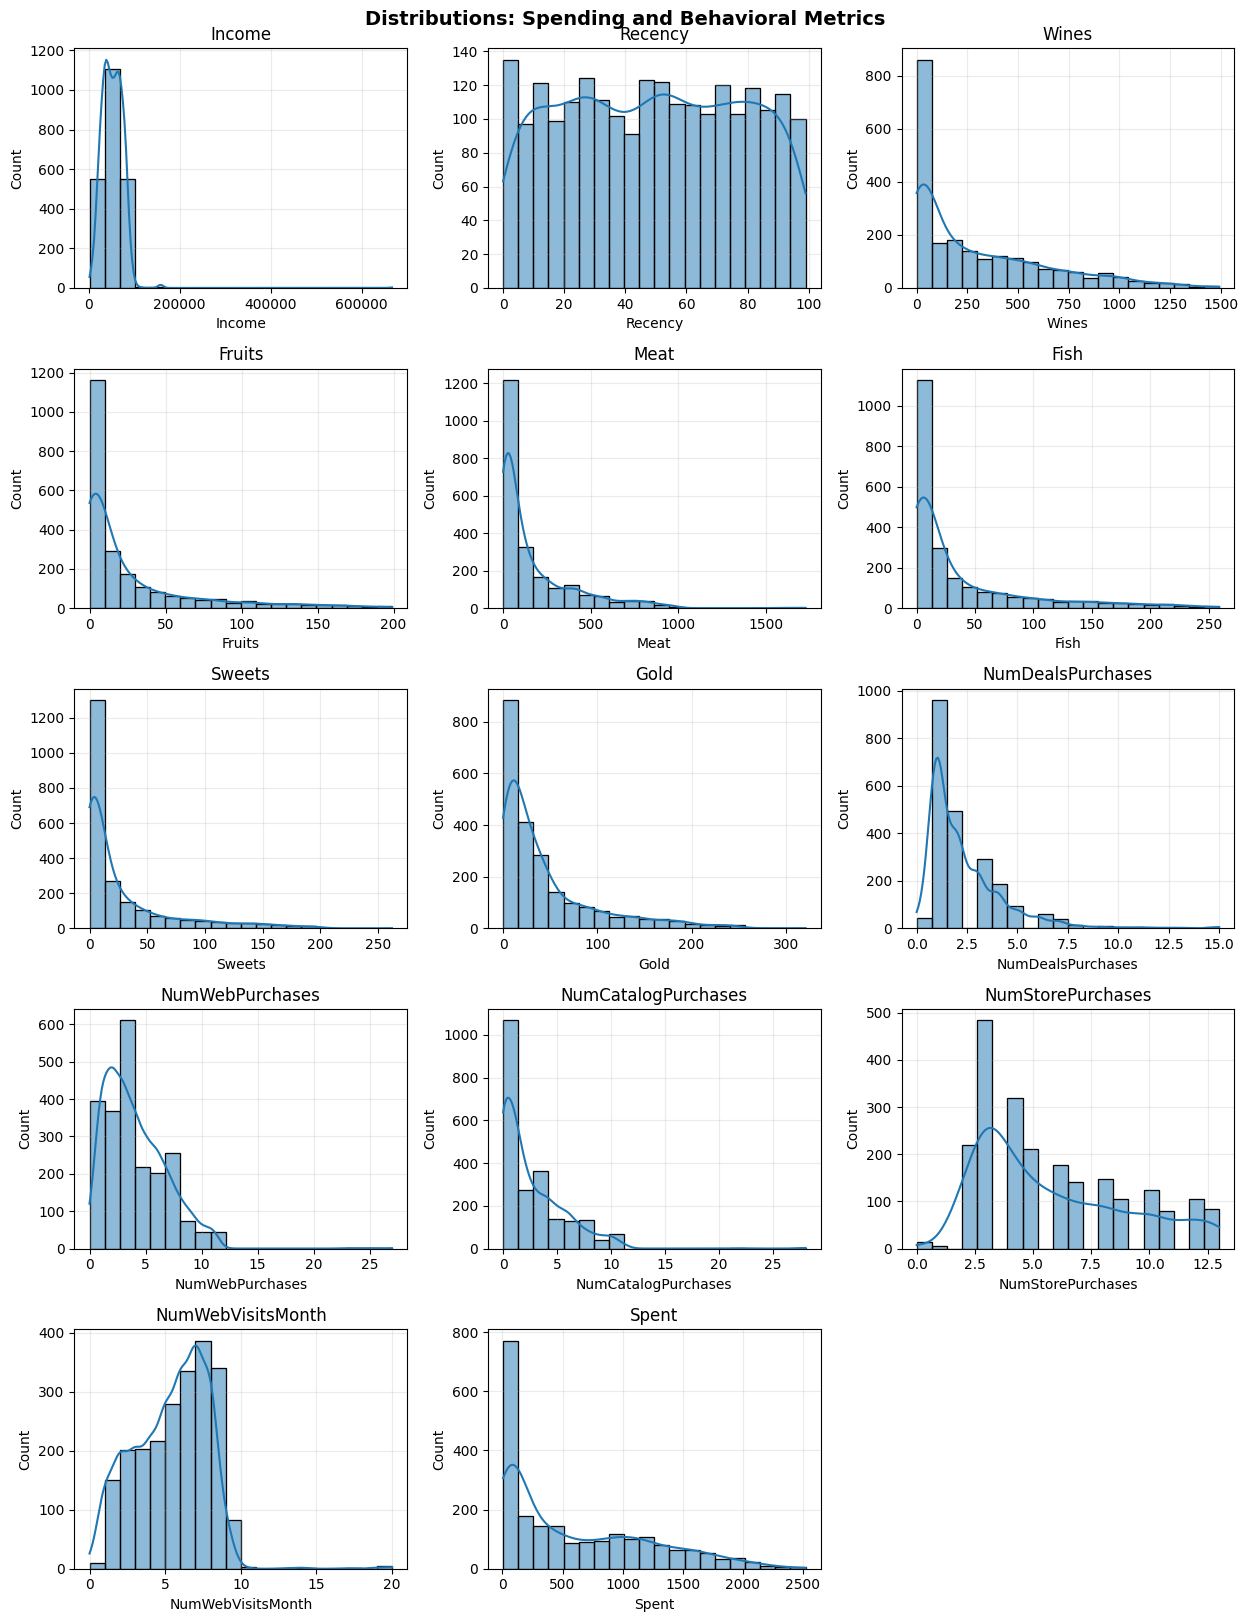

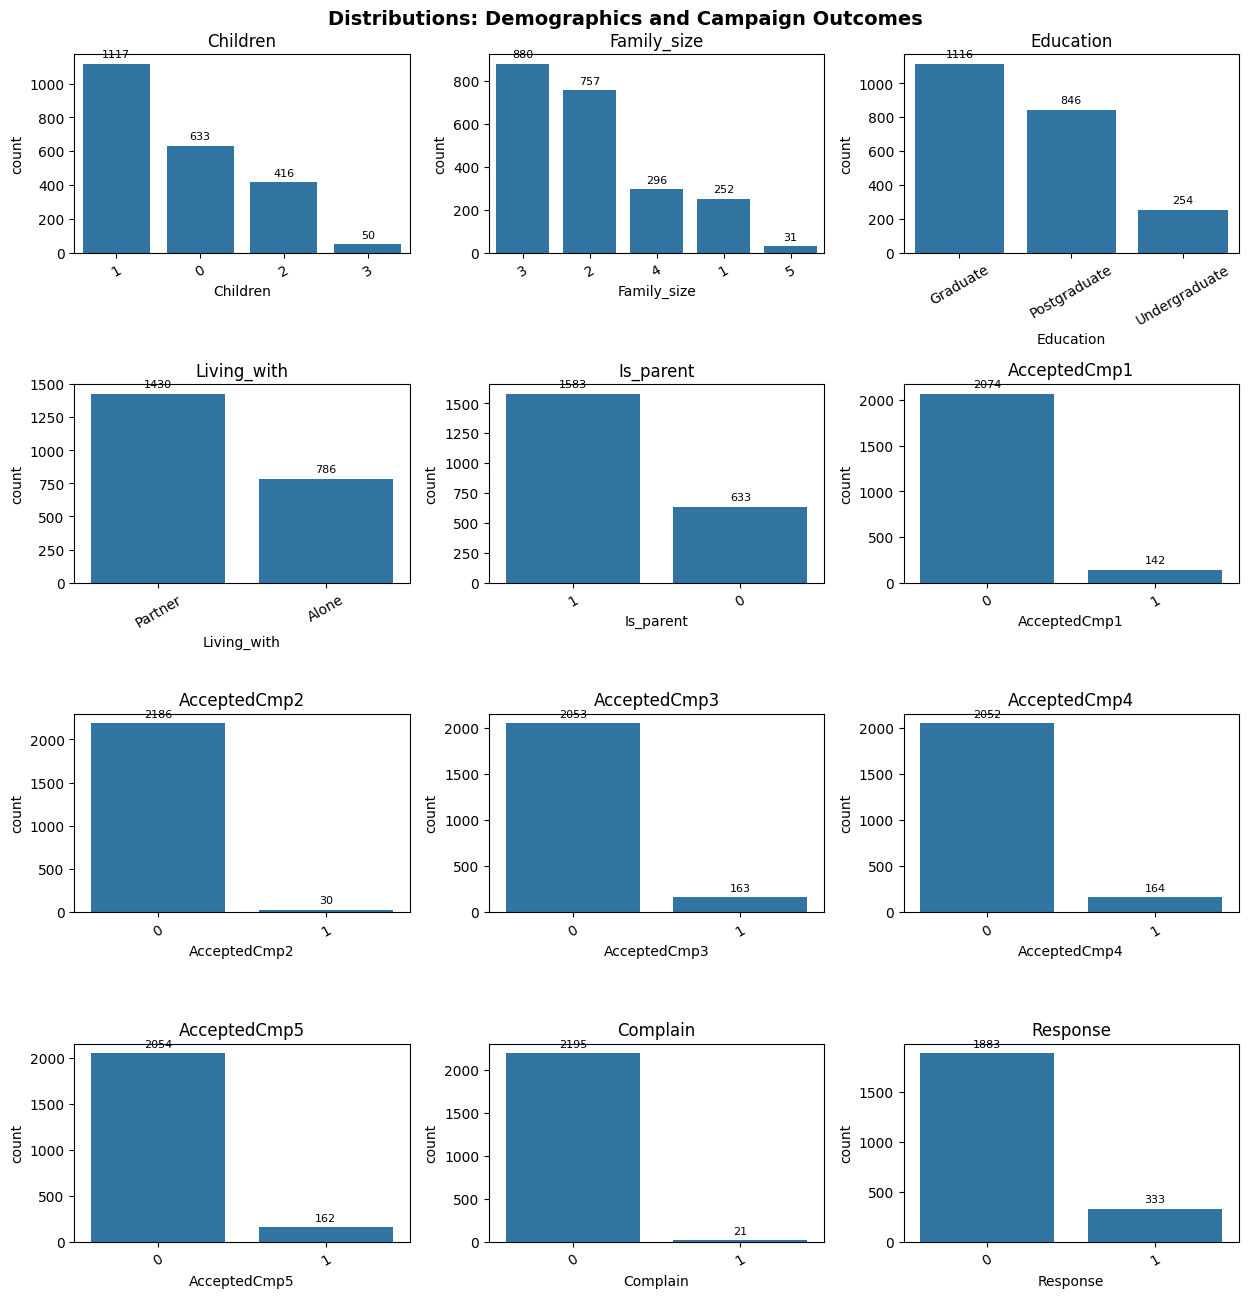

In [26]:
import math

def plot_hist_grid(df, cols, ncols=3, bins=20, kde=True, title=None):
    rows = math.ceil(len(cols) / ncols)
    fig, axes = plt.subplots(rows, ncols, figsize=(ncols*4.2, rows*3.3))
    axes = np.array(axes).reshape(-1)  # flatten
    for i, col in enumerate(cols):
        ax = axes[i]
        sns.histplot(data=df, x=col, bins=bins, kde=kde, ax=ax)
        ax.set_title(col)
        ax.grid(True, alpha=0.25)
    # hide unused axes
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)
    if title:
        fig.suptitle(title, fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

def _annotate_bars(ax):
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}', (p.get_x()+p.get_width()/2, height),
                        ha='center', va='bottom', fontsize=8, xytext=(0,3), textcoords='offset points')

def plot_mixed_grid(df, cols, ncols=3, title=None):
    rows = math.ceil(len(cols) / ncols)
    fig, axes = plt.subplots(rows, ncols, figsize=(ncols*4.2, rows*3.3))
    axes = np.array(axes).reshape(-1)
    for i, col in enumerate(cols):
        ax = axes[i]
        series = df[col]
        is_numeric = pd.api.types.is_numeric_dtype(series)
        few_levels = series.nunique(dropna=True) <= 10
        if is_numeric and not few_levels:
            sns.histplot(data=df, x=col, bins=20, kde=True, ax=ax)
            ax.grid(True, alpha=0.25)
        else:
            sns.countplot(data=df, x=col, ax=ax, order=series.value_counts().index)
            ax.tick_params(axis='x', rotation=30)
            _annotate_bars(ax)
        ax.set_title(col)
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)
    if title:
        fig.suptitle(title, fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

# ---- Distributions: spending and behavior (numeric) ----
numeric_cols = [
    'Income','Recency','Wines','Fruits','Meat','Fish','Sweets','Gold',
    'NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases',
    'NumWebVisitsMonth','Spent'
]
plot_hist_grid(df, numeric_cols, ncols=3, bins=20, kde=True,
               title='Distributions: Spending and Behavioral Metrics')

# ---- Mixed grid: demographics and campaign flags ----
mixed_cols = [
    'Children','Family_size','Education','Living_with','Is_parent',
    'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5',
    'Complain','Response'
]
plot_mixed_grid(df, mixed_cols, ncols=3, title='Distributions: Demographics and Campaign Outcomes')

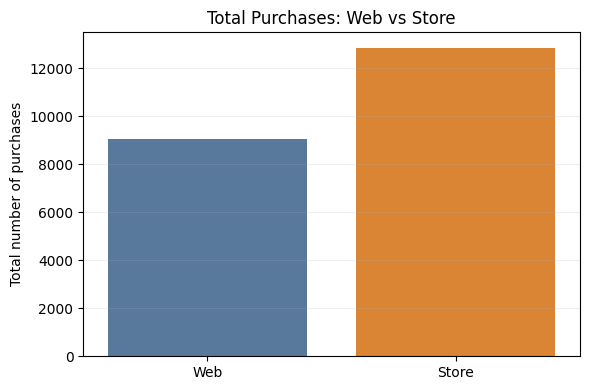

In [27]:
totals = df[['NumWebPurchases', 'NumStorePurchases']].sum()
plot_df = pd.DataFrame({
    'Channel': ['Web', 'Store'],
    'Purchases': [totals['NumWebPurchases'], totals['NumStorePurchases']]
})

plt.figure(figsize=(6,4))
ax = sns.barplot(
    data=plot_df, x='Channel', y='Purchases',
    hue='Channel', palette=['#4C78A8', '#F58518'], legend=False
)
ax.set_title('Total Purchases: Web vs Store')
ax.set_ylabel('Total number of purchases')
ax.set_xlabel('')
ax.grid(axis='y', alpha=0.2)

plt.tight_layout()
plt.show()

Silhouette by k: {3: 0.21, 4: 0.193, 5: 0.196, 6: 0.193, 7: 0.199}
Chosen k=3 with silhouette=0.210


,web_share,NumWebPurchases,NumWebVisitsMonth,NumDealsPurchases,spend_intensity,Wines_share,Fruits_share,Fish_share,Sweets_share
web_cluster,,,,,,,,,
1,0.429,6.332,6.722,4.094,5.696,0.853,0.042,0.061,0.045
0,0.323,2.541,5.949,1.869,3.970,0.301,0.212,0.280,0.207
2,0.272,3.441,4.181,1.464,5.336,0.790,0.057,0.092,0.061


Cluster sizes: {0: 495, 1: 648, 2: 1073}


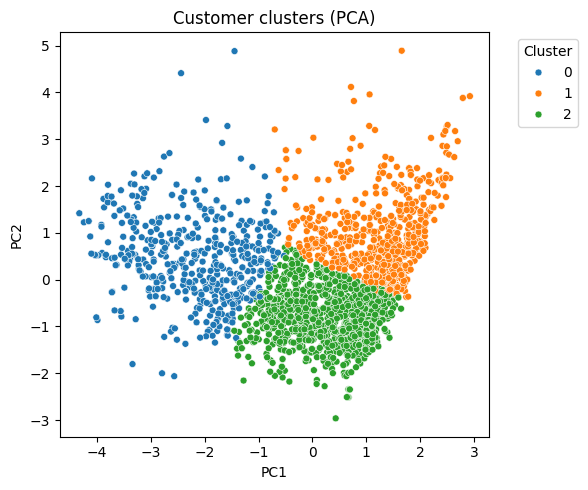

In [28]:
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# 1) Feature engineering
spend_cols4 = ['Wines','Fruits','Fish','Sweets']
spend4 = df[spend_cols4].sum(axis=1)
eps = 1e-9

for c in spend_cols4:
    df[f'{c}_share'] = df[c] / (spend4 + eps)

df['spend_intensity'] = np.log1p(spend4)

total_purchases = (df['NumWebPurchases'] 
                   + df['NumStorePurchases'] 
                   + df['NumCatalogPurchases'])
df['web_share'] = np.where(total_purchases > 0, 
                           df['NumWebPurchases'] / total_purchases, 0.0)

# 2) Final feature set focused on web growth
cluster_features = [
    'spend_intensity',
    'Wines_share','Fruits_share','Fish_share','Sweets_share',
    'NumWebPurchases','NumWebVisitsMonth','web_share',
    'NumDealsPurchases'
]

X = df[cluster_features].fillna(0)

# 3) Scale (robust to outliers)
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# 4) Choose k using silhouette
k_range = range(3, 8)
scores = {}
best_k, best_score = None, -1
for k in k_range:
    km = KMeans(n_clusters=k, n_init='auto', random_state=42)
    labels = km.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    scores[k] = score
    if score > best_score:
        best_k, best_score, best_model = k, score, km

print("Silhouette by k:", {k: round(v, 3) for k, v in scores.items()})
print(f"Chosen k={best_k} with silhouette={best_score:.3f}")

# 5) Fit final model and attach labels
df['web_cluster'] = best_model.predict(X_scaled)

# 6) Quick profiling of clusters
profile_cols = [
    'web_share','NumWebPurchases','NumWebVisitsMonth','NumDealsPurchases',
    'spend_intensity','Wines_share','Fruits_share','Fish_share','Sweets_share'
]
cluster_profile = df.groupby('web_cluster')[profile_cols].mean().sort_values('web_share', ascending=False)
display(cluster_profile.round(3))
print("Cluster sizes:", df['web_cluster'].value_counts().sort_index().to_dict())

# 7) 2D visualization (PCA)
pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X_scaled)
plt.figure(figsize=(6,5))
sns.scatterplot(x=X_2d[:,0], y=X_2d[:,1], hue=df['web_cluster'], palette='tab10', s=25)
plt.title('Customer clusters (PCA)')
plt.xlabel('PC1'); plt.ylabel('PC2'); plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(); plt.show()

Cluster summaries (means):


,web_share,NumWebPurchases,NumWebVisitsMonth,NumDealsPurchases,spend_intensity,Wines_share,Fruits_share,Fish_share,Sweets_share
web_cluster,,,,,,,,,
0,0.323,2.541,5.949,1.869,3.970,0.301,0.212,0.280,0.207
1,0.429,6.332,6.722,4.094,5.696,0.853,0.042,0.061,0.045
2,0.272,3.441,4.181,1.464,5.336,0.790,0.057,0.092,0.061


Cluster sizes: {0: 495, 1: 648, 2: 1073}

Interpretation by cluster:

Cluster 0  |  size=495
- Web preference: Med (web_share=0.32)
- Web engagement: Med (visits/mo=5.9)
- Online purchases: Med (mean=2.5)
- Deal sensitivity: Med (deals=1.9)
- Spend level: Low (log spend=3.97)
- Product tilt: Wines=30%, Fish=28%
- Actions: Entry-price packs and first-purchase discounts to activate online; Lead with Wines and Fish content/bundles on web

Cluster 1  |  size=648
- Web preference: High (web_share=0.43)
- Web engagement: Med (visits/mo=6.7)
- Online purchases: High (mean=6.3)
- Deal sensitivity: High (deals=4.1)
- Spend level: Med (log spend=5.70)
- Product tilt: Wines=85%, Fish=6%
- Actions: Use targeted web coupons, bundles, and time-limited promos; Lead with Wines and Fish content/bundles on web

Cluster 2  |  size=1073
- Web preference: Med (web_share=0.27)
- Web engagement: Med (visits/mo=4.2)
- Online purchases: Med (mean=3.4)
- Deal sensitivity: Med (deals=1.5)
- Spend level: Med (log

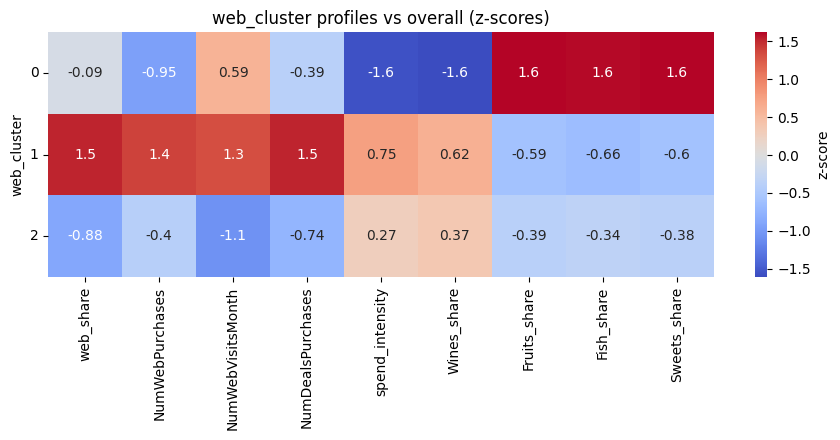

In [29]:
required_cols = [
    'web_cluster',
    'web_share','NumWebPurchases','NumWebVisitsMonth','NumDealsPurchases',
    'spend_intensity','Wines_share','Fruits_share','Fish_share','Sweets_share'
]
missing = [c for c in required_cols if c not in df.columns]
if missing:
    raise ValueError(f"Missing columns for interpretation: {missing}. Run the clustering cell first.")

profile_cols = [
    'web_share','NumWebPurchases','NumWebVisitsMonth','NumDealsPurchases',
    'spend_intensity','Wines_share','Fruits_share','Fish_share','Sweets_share'
]

# Global stats and thresholds for Low/Med/High labels
q = df[profile_cols].quantile([0.33, 0.66])
mean_vals = df[profile_cols].mean()

def label_quant(v, low, high):
    return 'Low' if v < low else ('High' if v > high else 'Med')

def pct(x):
    return f"{100*x:.0f}%"

cluster_means = df.groupby('web_cluster')[profile_cols].mean().sort_index()
sizes = df['web_cluster'].value_counts().sort_index()

print("Cluster summaries (means):")
display(cluster_means.round(3))
print("Cluster sizes:", sizes.to_dict())

print("\nInterpretation by cluster:\n" + "="*80)
for cid, row in cluster_means.iterrows():
    size = int(sizes.loc[cid])

    web_pref_lbl = label_quant(row['web_share'], q.loc[0.33, 'web_share'], q.loc[0.66, 'web_share'])
    visits_lbl   = label_quant(row['NumWebVisitsMonth'], q.loc[0.33, 'NumWebVisitsMonth'], q.loc[0.66, 'NumWebVisitsMonth'])
    buys_lbl     = label_quant(row['NumWebPurchases'], q.loc[0.33, 'NumWebPurchases'], q.loc[0.66, 'NumWebPurchases'])
    deals_lbl    = label_quant(row['NumDealsPurchases'], q.loc[0.33, 'NumDealsPurchases'], q.loc[0.66, 'NumDealsPurchases'])
    spend_lbl    = label_quant(row['spend_intensity'], q.loc[0.33, 'spend_intensity'], q.loc[0.66, 'spend_intensity'])

    # Top product tilts by share
    prod_shares = {
        'Wines': row['Wines_share'],
        'Fruits': row['Fruits_share'],
        'Fish': row['Fish_share'],
        'Sweets': row['Sweets_share'],
    }
    top2 = sorted(prod_shares.items(), key=lambda kv: kv[1], reverse=True)[:2]

    # Opportunity rules (concise, actionable)
    actions = []
    if visits_lbl == 'High' and web_pref_lbl != 'High':
        actions.append("Convert high web visitors: optimize UX, remarket, web-only incentives")
    if deals_lbl == 'High':
        actions.append("Use targeted web coupons, bundles, and time-limited promos")
    if spend_lbl == 'High' and web_pref_lbl == 'High':
        actions.append("Upsell/cross-sell online; push subscriptions/loyalty to lift AOV")
    if spend_lbl == 'Low' and web_pref_lbl in ('Low', 'Med'):
        actions.append("Entry-price packs and first-purchase discounts to activate online")
    # Always align with product tilt
    actions.append(f"Lead with {top2[0][0]} and {top2[1][0]} content/bundles on web")

    # Print interpretation
    print(f"\nCluster {cid}  |  size={size}")
    print(f"- Web preference: {web_pref_lbl} (web_share={row['web_share']:.2f})")
    print(f"- Web engagement: {visits_lbl} (visits/mo={row['NumWebVisitsMonth']:.1f})")
    print(f"- Online purchases: {buys_lbl} (mean={row['NumWebPurchases']:.1f})")
    print(f"- Deal sensitivity: {deals_lbl} (deals={row['NumDealsPurchases']:.1f})")
    print(f"- Spend level: {spend_lbl} (log spend={row['spend_intensity']:.2f})")
    print(f"- Product tilt: {top2[0][0]}={pct(top2[0][1])}, {top2[1][0]}={pct(top2[1][1])}")
    print("- Actions: " + "; ".join(actions))

# Optional: compact heatmap to support the narrative
import matplotlib.pyplot as plt
import seaborn as sns
z = (cluster_means - mean_vals) / cluster_means.std(ddof=0)
plt.figure(figsize=(9, 4.5))
sns.heatmap(z[['web_share','NumWebPurchases','NumWebVisitsMonth','NumDealsPurchases','spend_intensity',
               'Wines_share','Fruits_share','Fish_share','Sweets_share']].round(2),
            cmap='coolwarm', center=0, annot=True, cbar_kws={'label':'z-score'})
plt.title('web_cluster profiles vs overall (z-scores)')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
#

I have the clusters in 3 groups. Now it's possible to recognize and classify new data ?

Yes. Save scaler + KMeans, then apply identical feature engineering to new records before predicting

In [30]:
# === Persist artifacts (run right after clustering) ===
import joblib

cluster_features = [
    'spend_intensity',
    'Wines_share','Fruits_share','Fish_share','Sweets_share',
    'NumWebPurchases','NumWebVisitsMonth','web_share',
    'NumDealsPurchases'
]

# Ensure objects exist
_ = best_model.cluster_centers_
_ = scaler.center_ if hasattr(scaler, 'center_') else scaler.scale_

joblib.dump(scaler, 'scaler.pkl')
joblib.dump(best_model, 'kmeans.pkl')
print("Saved: scaler.pkl, kmeans.pkl")

# Optional: segment name mapping if created earlier
segment_map = df.groupby('web_cluster')['segment_name'].first() if 'segment_name' in df.columns else None
if segment_map is not None:
    joblib.dump(segment_map.to_dict(), 'segment_map.pkl')
    print("Saved: segment_map.pkl")

Saved: scaler.pkl, kmeans.pkl


Inference on new data

In [31]:
# === Inference on new data ===
import joblib
import numpy as np
import pandas as pd
import os

scaler = joblib.load('scaler.pkl')
kmeans = joblib.load('kmeans.pkl')
segment_map = joblib.load('segment_map.pkl') if os.path.exists('segment_map.pkl') else None

def classify_new(new_df: pd.DataFrame) -> pd.DataFrame:
    """Return original rows with added cluster (web_cluster) and optional segment_name."""
    req = ['Wines','Fruits','Fish','Sweets',
           'NumWebPurchases','NumStorePurchases','NumCatalogPurchases',
           'NumDealsPurchases','NumWebVisitsMonth']
    missing = [c for c in req if c not in new_df.columns]
    if missing:
        raise ValueError(f"Missing columns: {missing}")

    eps = 1e-9
    spend4 = new_df[['Wines','Fruits','Fish','Sweets']].sum(axis=1)
    for c in ['Wines','Fruits','Fish','Sweets']:
        new_df[f'{c}_share'] = new_df[c] / (spend4 + eps)

    new_df['spend_intensity'] = np.log1p(spend4)

    total_purchases = (new_df['NumWebPurchases']
                       + new_df['NumStorePurchases']
                       + new_df['NumCatalogPurchases'])
    new_df['web_share'] = np.where(total_purchases > 0,
                                   new_df['NumWebPurchases'] / total_purchases, 0.0)

    X_new = new_df[cluster_features].fillna(0)
    X_scaled = scaler.transform(X_new)
    new_df['web_cluster'] = kmeans.predict(X_scaled)

    if segment_map:
        new_df['segment_name'] = new_df['web_cluster'].map(segment_map)

    # Optional: distance to assigned centroid
    centers = kmeans.cluster_centers_
    dists = np.linalg.norm(X_scaled - centers[new_df['web_cluster']], axis=1)
    new_df['cluster_distance'] = dists

    return new_df


In [32]:
incoming = pd.read_csv('../data/new_customers.csv')
classified = classify_new(incoming)
classified.head()

,ID,Wines,Fruits,Fish,Sweets,NumWebPurchases,NumStorePurchases,NumCatalogPurchases,NumDealsPurchases,NumWebVisitsMonth,Wines_share,Fruits_share,Fish_share,Sweets_share,spend_intensity,web_share,web_cluster,cluster_distance
0,5524,635,88,172,88,8,4,10,3,7,0.645982,0.089522,0.174975,0.089522,6.891626,0.363636,1,1.420328
1,2174,11,1,2,1,1,2,1,2,5,0.733333,0.066667,0.133333,0.066667,2.772589,0.250000,2,1.181970
2,4141,426,49,111,21,8,10,2,1,4,0.701812,0.080725,0.182867,0.034596,6.410175,0.400000,2,1.640733
3,6182,11,4,10,3,2,4,0,2,6,0.392857,0.142857,0.357143,0.107143,3.367296,0.333333,0,1.243290
4,5324,173,43,46,27,5,6,3,5,5,0.598616,0.148789,0.159170,0.093426,5.669881,0.357143,1,1.668765


Plotting cell after loading and classifying the new data to compare training vs new data and visualize how new records align to the discovered clusters. It uses PCA fit on the training features, overlays the new points, and shows cluster distribution side-by-side.

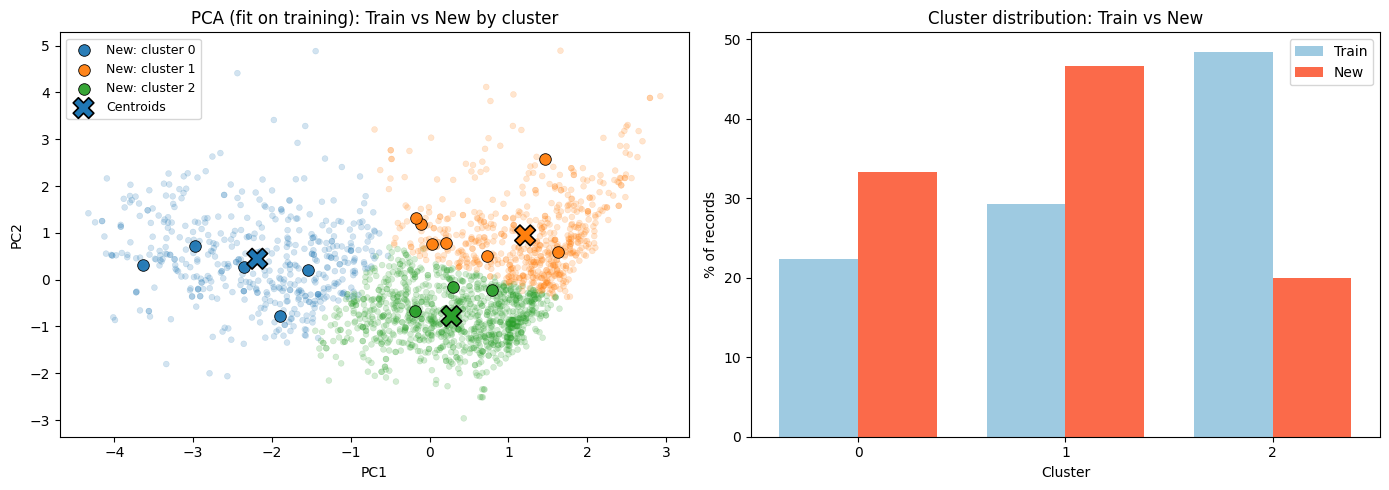

In [33]:
# Training vs New data: PCA overlay + cluster distribution
from sklearn.decomposition import PCA

# 1) Prepare scaled features for train and new (using the saved scaler)
X_train = df[cluster_features].fillna(0)
X_train_scaled = scaler.transform(X_train)

X_new = classified[cluster_features].fillna(0)
X_new_scaled = scaler.transform(X_new)

# 2) Fit PCA on training, transform both sets and the centroids
pca = PCA(n_components=2, random_state=42)
train_2d = pca.fit_transform(X_train_scaled)
new_2d = pca.transform(X_new_scaled)
centers_2d = pca.transform(kmeans.cluster_centers_)

# 3) Color mapping consistent across clusters
n_clusters = kmeans.n_clusters
palette = sns.color_palette('tab10', n_colors=n_clusters)
color_map = {i: palette[i] for i in range(n_clusters)}

# 4) Plot overlay + distribution bars
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 4a) Left: PCA scatter overlay
ax = axes[0]
# Training points (faint)
sns.scatterplot(
    x=train_2d[:,0], y=train_2d[:,1],
    hue=df['web_cluster'], palette=color_map,
    alpha=0.20, s=18, edgecolor=None, legend=False, ax=ax
)

# New points (emphasized) by predicted cluster
for cid in sorted(classified['web_cluster'].unique()):
    mask = classified['web_cluster'] == cid
    ax.scatter(
        new_2d[mask, 0], new_2d[mask, 1],
        c=[color_map[cid]], s=70, marker='o', edgecolors='k', linewidths=0.6,
        label=f'New: cluster {cid}', alpha=0.95
    )

# Centroids
ax.scatter(
    centers_2d[:,0], centers_2d[:,1],
    c=[color_map[i] for i in range(n_clusters)],
    s=220, marker='X', edgecolors='k', linewidths=1.2, label='Centroids'
)

ax.set_title('PCA (fit on training): Train vs New by cluster')
ax.set_xlabel('PC1'); ax.set_ylabel('PC2')
ax.legend(frameon=True, fontsize=9)

# 4b) Right: Cluster distribution comparison (% of records)
train_counts = df['web_cluster'].value_counts().sort_index()
new_counts = classified['web_cluster'].value_counts().sort_index()
clusters = sorted(set(train_counts.index).union(new_counts.index))

train_pct = [100 * train_counts.get(i, 0) / len(df) for i in clusters]
new_pct = [100 * new_counts.get(i, 0) / len(classified) for i in clusters]

x = np.arange(len(clusters))
w = 0.38
axes[1].bar(x - w/2, train_pct, width=w, color='#9ecae1', label='Train')
axes[1].bar(x + w/2, new_pct, width=w, color='#fb6a4a', label='New')
axes[1].set_xticks(x); axes[1].set_xticklabels([f'{i}' for i in clusters])
axes[1].set_ylabel('% of records'); axes[1].set_xlabel('Cluster')
axes[1].set_title('Cluster distribution: Train vs New')
axes[1].legend()

plt.tight_layout()
plt.show()
